In [1]:
import json
import csv
import os
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score
from matplotlib import pyplot as plt

In [2]:
ins_info = {}
processed_folder = "/data/yirui/datasets/LN_classify/rtNetData/images/preprocessed/Task007_Fudan_HN_LN_270_cases"
with open(
        os.path.join(processed_folder, 'cropping_list.csv'), 'r') as data:
    for line in csv.DictReader(data):
        s_pth = line['path'].replace("/", "_")
        s_basename = line['basename']
        filename = s_pth + '_' + s_basename if s_pth else s_basename
        filename += '_pos' if int(line['label']) == 1 else '_neg'
        ins_info[filename] = {'recist': line['recist'], 'label': line['label']}

json_file = os.path.join(processed_folder, "dataset.json")
with open(json_file) as jsn:
    d = json.load(jsn)
    testing_files = d['test']

testset = [p.split('/')[-1][:-7] for p in testing_files]
print(testset[:5])

['ZS12131203_ins1_neg', 'ZS12131203_ins2_neg', 'ZS12131203_ins3_neg', 'ZS12131203_ins4_neg', 'ZS12131203_ins5_neg']


In [3]:
testset_info = {k:v for k,v in ins_info.items() if k in testset}
print("Total {} test cases".format(len(testset_info)))

Total 487 test cases


#### Test RECIST < N mm LNs

In [14]:
pos_cnt = 0
neg_cnt = 0
testset_small_info = {}
for k, v in testset_info.items():
    if int(v['label']) == 1:  # pos
        # if float(v['recist']) <= 10:
        testset_small_info[k] = v
        pos_cnt += 1
    else:
        if float(v['recist']) >= 5:
            testset_small_info[k] = v
            neg_cnt += 1
# print("Total {} test samples for RECIST >=5 and <= 10".format(len(testset_small_info)))
print("Total {} test samples for RECIST >=5".format(len(testset_small_info)))
print("Positive {} cases, negative {} cases".format(pos_cnt, neg_cnt))

Total 202 test samples for RECIST >=5
Positive 126 cases, negative 76 cases


### The whole test set

In [4]:
pred_all = np.array([float(v['recist']) for _,v in testset_info.items()])
label_all = np.array([int(v['label']) for _,v in testset_info.items()])
print("Test samples RECIST [Min, Mean, Max] statistics")
print("Min: {}, Mean: {}, Max: {}".format(pred_all.min(), pred_all.mean(), pred_all.max()))

# fpr_all, tpr_all, thres_all = roc_curve(label_all.flatten(), pred_all.flatten())
# roc_auc_all = auc(fpr_all, tpr_all)
# print("AUC is {}".format(roc_auc_all))

# youden_all = (1 - fpr_all) + tpr_all - 1
# thres_index_all= np.argmax(youden_all)
# thres_all = thres_all[thres_index_all]
thres_all = 10
binary_pred_all = (pred_all >= thres_all).astype(np.int)
hit = np.sum(1.0 * (binary_pred_all == label_all))
total = binary_pred_all.shape[0]
acc_all = hit / total
print("Accuracy is {}".format(acc_all))

roc_f1_score_all = f1_score(label_all, binary_pred_all, average='binary')
print(f"F1 score is {roc_f1_score_all}")

tn, fp, fn, tp = confusion_matrix(label_all, binary_pred_all).ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
print("Specificity (>=10mm) is {}".format(specificity))
print("Sensitivity (>=10mm) is {}".format(recall))
print("\n")

thres_all = 9
binary_pred_all = (pred_all >= thres_all).astype(np.int)
hit = np.sum(1.0 * (binary_pred_all == label_all))
total = binary_pred_all.shape[0]
acc_all = hit / total
print("Accuracy is {}".format(acc_all))

roc_f1_score_all = f1_score(label_all, binary_pred_all, average='binary')
print(f"F1 score is {roc_f1_score_all}")

tn, fp, fn, tp = confusion_matrix(label_all, binary_pred_all).ravel()
specificity_9 = tn / (tn + fp)
recall_9 = tp / (tp + fn)
print("Specificity (>=9mm) is {}".format(specificity_9))
print("Sensitivity (>=9mm) is {}".format(recall_9))
print("\n")

thres_all = 8
binary_pred_all = (pred_all >= thres_all).astype(np.int)
hit = np.sum(1.0 * (binary_pred_all == label_all))
total = binary_pred_all.shape[0]
acc_all = hit / total
print("Accuracy is {}".format(acc_all))

roc_f1_score_all = f1_score(label_all, binary_pred_all, average='binary')
print(f"F1 score is {roc_f1_score_all}")

tn, fp, fn, tp = confusion_matrix(label_all, binary_pred_all).ravel()
specificity_8 = tn / (tn + fp)
recall_8 = tp / (tp + fn)
print("Specificity (>=8mm) is {}".format(specificity_8))
print("Sensitivity (>=8mm) is {}".format(recall_8))
print("\n")

thres_all = 7
binary_pred_all = (pred_all >= thres_all).astype(np.int)
hit = np.sum(1.0 * (binary_pred_all == label_all))
total = binary_pred_all.shape[0]
acc_all = hit / total
print("Accuracy is {}".format(acc_all))

roc_f1_score_all = f1_score(label_all, binary_pred_all, average='binary')
print(f"F1 score is {roc_f1_score_all}")

tn, fp, fn, tp = confusion_matrix(label_all, binary_pred_all).ravel()
specificity_7 = tn / (tn + fp)
recall_7 = tp / (tp + fn)
print("Specificity (>=7mm) is {}".format(specificity_7))
print("Sensitivity (>=7mm) is {}".format(recall_7))

Test samples RECIST [Min, Mean, Max] statistics
Min: 1.988737822, Mean: 6.1545785565400415, Max: 37.22869778
Accuracy is 0.8357289527720739
F1 score is 0.5698924731182795
Specificity (>=10mm) is 0.9806094182825484
Sensitivity (>=10mm) is 0.42063492063492064


Accuracy is 0.8459958932238193
F1 score is 0.6073298429319371
Specificity (>=9mm) is 0.9806094182825484
Sensitivity (>=9mm) is 0.4603174603174603


Accuracy is 0.864476386036961
F1 score is 0.6915887850467289
Specificity (>=8mm) is 0.961218836565097
Sensitivity (>=8mm) is 0.5873015873015873


Accuracy is 0.86652977412731
F1 score is 0.7161572052401747
Specificity (>=7mm) is 0.9418282548476454
Sensitivity (>=7mm) is 0.6507936507936508


/home/yirui.wang/anaconda3/envs/rtnet/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/yirui.wang/anaconda3/envs/rtnet/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

### >=5mm test set

In [ ]:
# pred_small = np.array([float(v['recist']) for _,v in testset_small_info.items()])
# label_small = np.array([int(v['label']) for _,v in testset_small_info.items()])
# print("Test samples RECIST [Min, Mean, Max] statistics")
# print("Min: {}, Mean: {}, Max: {}".format(pred_small.min(), pred_small.mean(), pred_small.max()))

# thres_all = 10
# binary_pred_small = (pred_small >= thres_all).astype(np.int)
# hit = np.sum(1.0 * (binary_pred_small == label_small))
# total = binary_pred_small.shape[0]
# acc_all = hit / total
# print("Accuracy is {}".format(acc_all))

# roc_f1_score_small = f1_score(label_small, binary_pred_small, average='binary')
# print(f"F1 score is {roc_f1_score_small}")

# tn, fp, fn, tp = confusion_matrix(label_small, binary_pred_small).ravel()
# specificity_gt5 = tn / (tn + fp)
# recall_gt5 = tp / (tp + fn)
# print("Specificity is {}".format(specificity_gt5))
# print("Sensitivity is {}".format(recall_gt5))

### Learning Based Method

Total 487 testing samples, 126 positive samples and 361 negative samples
AUROC score is 0.9445
Sen. at Youden is 0.8889, Spe. at Youden is 0.8670

Accuracy at Youden is 0.8727
F1 score is 0.7832

PPV is 0.7000 and NPV is 0.9572


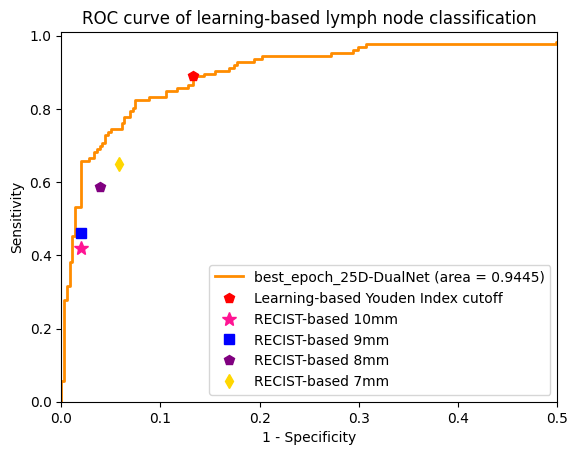

In [6]:
root = "/data/yirui/exps/Fudan_HN_LN"
pred_sub_folders = []
pred_file_path_collect = []
tags = ['best_epoch_25D-DualNet']
# tags = ['last_epoch_size_preserving', 'best_epoch_size_invariant']
line_colors = ['darkorange', 'green', 'pink']

# # last epoch, size preserving
# pred_sub_folder = "last_epoch/mobilenetv3_large_2d_fudan_hn_ln_bce_loss/predictions.txt"
# pred_sub_folders.append(pred_sub_folder)
# pred_file_paths = [
#     "2023-07-01-08:58:28__mobilenet_v3_large_25D_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold0",
#     "2023-07-01-08:58:28__mobilenet_v3_large_25D_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold1",
#     "2023-07-01-08:58:28__mobilenet_v3_large_25D_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold2",
#     "2023-07-01-08:58:28__mobilenet_v3_large_25D_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold3",
# ]
# pred_file_path_collect.append(pred_file_paths)

# # last epoch, size invariant
# pred_sub_folder = "best_epoch/mobilenetv3_large_25d_fudan_hn_ln_bce_loss_szInvar/predictions.txt"
# pred_sub_folders.append(pred_sub_folder)
# pred_file_paths = [
#     "2023-07-04-06:36:07__mobilenet_v3_large_25D_SzInvar_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold0",
#     "2023-07-04-06:36:07__mobilenet_v3_large_25D_SzInvar_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold1",
#     "2023-07-04-06:36:07__mobilenet_v3_large_25D_SzInvar_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold2",
#     "2023-07-04-06:36:07__mobilenet_v3_large_25D_SzInvar_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold3",
# ]

# 2.5D invariant preserving model
pred_sub_folder = "best_epoch_3PredEnsemble/mobilenetv3_large_25d_fudan_hn_ln_bce_loss_dual/predictions.txt"
pred_sub_folders.append(pred_sub_folder)
pred_file_paths = [
    "2023-07-20-03:54:09__mobilenet_v3_large_25D_SideSuper_smallInvarNet_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold0",
    "2023-07-20-03:54:09__mobilenet_v3_large_25D_SideSuper_smallInvarNet_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold1",
    "2023-07-20-03:54:09__mobilenet_v3_large_25D_SideSuper_smallInvarNet_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold2",
    "2023-07-20-03:54:09__mobilenet_v3_large_25D_SideSuper_smallInvarNet_TrGsz2_TsGsz2_bsz16_lr5e-5_wd5e-4_r0.025_rtwarmcos_warm5_SGD_1000/fold3",
]
pred_file_path_collect.append(pred_file_paths)
# pred_file_path_collect.append(pred_file_paths)


plt.figure()
lw = 2
for tag_id, tag in enumerate(tags):
    image_list = []
    labels = []
    logits = []
    pos_cnt, neg_cnt = 0, 0
    for idx, fold in enumerate(pred_file_path_collect[tag_id]):
        pred_file = os.path.join(root, fold, pred_sub_folders[tag_id])

        with open(pred_file, "r") as f:
            pred_contents = f.read().splitlines()

        tmp_image_list = []
        tmp_labels = []
        tmp_logits = []
        for row in pred_contents:
            img_name, lab, pred = row.split(',')
            tmp_image_list.append(img_name)
            tmp_labels.append(int(lab))
            tmp_logits.append(float(pred))

            if idx == 0:
                if int(lab) == 1:
                    pos_cnt += 1
                else:
                    neg_cnt += 1

        tmp_labels = np.array(tmp_labels)
        tmp_logits = np.array(tmp_logits)
        labels.append(tmp_labels)
        logits.append(tmp_logits)
        image_list.append(tmp_image_list)

    image_list = image_list[0]
    labels = labels[0]
    logits_min = np.min(np.stack(logits), axis=0)
    logits_max = np.max(np.stack(logits), axis=0)
    logits_mean = np.mean(np.stack(logits), axis=0)
    logits_median = np.median(np.stack(logits), axis=0)
    logits = logits_mean
    # logits = np.median(np.stack(logits), axis=0)
    print("Total {} testing samples, {} positive samples and {} negative samples".format(len(image_list), pos_cnt, neg_cnt))

    # save prediction scores and labels
    with open(os.path.join("/home/yirui.wang/Desktop", "25D_new270_ensemble_predictions_{}.txt".format(tag)), "w") as f:
        for i, v in enumerate(image_list):
            f.write("{},{},{}".format(v, labels[i], logits[i]))
            f.write("\n")
    
    fpr, tpr, thres = roc_curve(labels, logits)
    roc_auc = auc(fpr, tpr)
    print("AUROC score is {:.4f}".format(roc_auc))

    # selecting operating point (Youden Index)
    youden = (1 - fpr) + tpr - 1
    thres_index = np.argmax(youden)
    operating_thres = thres[thres_index]

    binary_pred = logits >= operating_thres
    hit = binary_pred == labels
    accuracy = np.sum(hit) / hit.shape[0]
    print(f"Sen. at Youden is {tpr[thres_index]:.4f}, Spe. at Youden is {1 - fpr[thres_index]:.4f}\n")
    print(f"Accuracy at Youden is {accuracy:.4f}")
    roc_f1_score = f1_score(labels, binary_pred, average='binary')
    print(f"F1 score is {roc_f1_score:.4f}")

    # PPV and NPV
    PPV = np.sum(binary_pred[labels == 1]) / np.sum(binary_pred == 1)
    NPV = np.sum((1 - binary_pred)[labels == 0]) / np.sum(binary_pred == 0)
    print(f"\nPPV is {PPV:.4f} and NPV is {NPV:.4f}")
    
    # draw
    plt.plot(
        fpr,
        tpr,
        color=line_colors[tag_id],
        lw=lw,
        label="%s (area = %0.4f)" % (tag, roc_auc),
    )
    # plot max youden index
    x = fpr[thres_index]
    y = tpr[thres_index]
    plt.plot(x, y, marker='p', markersize=7, color='red', linestyle = 'None', label="Learning-based Youden Index cutoff")
    
    
plt.plot(1 - specificity, recall, marker='*', markersize=10, color='deeppink', linestyle = 'None', label="RECIST-based 10mm")
plt.plot(1 - specificity_9, recall_9, marker='s', markersize=7, color='blue', linestyle = 'None', label="RECIST-based 9mm")
plt.plot(1 - specificity_8, recall_8, marker='p', markersize=7, color='purple', linestyle = 'None', label="RECIST-based 8mm")
plt.plot(1 - specificity_7, recall_7, marker='d', markersize=7, color='gold', linestyle = 'None', label="RECIST-based 7mm")

plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.01])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title(f"ROC curve of learning-based lymph node classification")
plt.legend(loc="lower right")
plt.show()


#### Ensemble Size-preserving and Size-invariant

In [9]:
# pred_file_paths = [
#     "/home/yirui.wang/Desktop/25D_new270_ensemble_predictions_best_epoch_size_invariant.txt",
#     "/home/yirui.wang/Desktop/25D_new270_ensemble_predictions_last_epoch_size_preserving.txt"
# ]

pred_file_paths = ['/home/yirui.wang/Desktop/25D_new270_ensemble_predictions_best_epoch_25D-DualNet.txt']

image_list = []
labels = []
logits = []
pos_cnt, neg_cnt = 0, 0
for idx, pred_file in enumerate(pred_file_paths):

    with open(pred_file, "r") as f:
        pred_contents = f.read().splitlines()

    tmp_image_list = []
    tmp_labels = []
    tmp_logits = []
    for row in pred_contents:
        img_name, lab, pred = row.split(',')
        tmp_image_list.append(img_name)
        tmp_labels.append(int(lab))
        tmp_logits.append(float(pred))

        if idx == 0:
            if int(lab) == 1:
                pos_cnt += 1
            else:
                neg_cnt += 1

    tmp_labels = np.array(tmp_labels)
    tmp_logits = np.array(tmp_logits)
    labels.append(tmp_labels)
    logits.append(tmp_logits)
    image_list.append(tmp_image_list)

image_list = image_list[0]
labels = labels[0]
logits_min = np.min(np.stack(logits), axis=0)
logits_max = np.max(np.stack(logits), axis=0)
logits_mean = np.mean(np.stack(logits), axis=0)
logits_median = np.median(np.stack(logits), axis=0)
logits = logits_mean
# logits = np.median(np.stack(logits), axis=0)
print("Total {} testing samples, {} positive samples and {} negative samples".format(len(image_list), pos_cnt, neg_cnt))

# save prediction scores and labels
with open(os.path.join("/home/yirui.wang/Desktop", "25D_new270_prev_invar_mean_ensemble_predictions.txt"), "w") as f:
    for i, v in enumerate(image_list):
        f.write("{},{},{}".format(v, labels[i], logits[i]))
        f.write("\n")

Total 487 testing samples, 126 positive samples and 361 negative samples


ensemble_of_presv_invar
AUROC score is 0.9445
Youden threshold: 0.046768548085425875
Sen. at Youden is 0.8889, Spe. at Youden is 0.8670
Accuracy at Youden is 0.8727
F1 score is 0.7832
PPV is 0.7000 and NPV is 0.9572




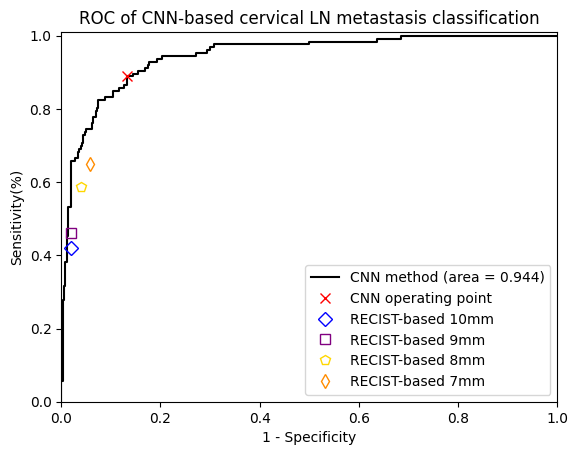

In [10]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
# pred_file_paths = [
#     "/home/yirui.wang/Desktop/presv_invar_ensemble_predictions.txt",
#     "/home/yirui.wang/Desktop/ensemble_predictions_last_epoch_size_invariant_w_RECIST.txt",
# ]

pred_file_paths = [
    "/home/yirui.wang/Desktop/25D_new270_prev_invar_mean_ensemble_predictions.txt"
]

tags = ['ensemble_of_presv_invar']
line_colors = ['darkorange', 'gray', 'green']
line_type = ['solid', 'dashed', 'dotted']

# Draw all results
plt.figure()
lw = 2

for idx, pred_file in enumerate(pred_file_paths):

    with open(pred_file, "r") as f:
        pred_contents = f.read().splitlines()

    tmp_image_list = []
    tmp_labels = []
    tmp_logits = []
    for row in pred_contents:
        img_name, lab, pred = row.split(',')
        tmp_image_list.append(img_name)
        tmp_labels.append(int(lab))
        tmp_logits.append(float(pred))

        if idx == 0:
            if int(lab) == 1:
                pos_cnt += 1
            else:
                neg_cnt += 1

    tmp_labels = np.array(tmp_labels)
    tmp_logits = np.array(tmp_logits)
    labels = np.array(tmp_labels)
    logits = np.array(tmp_logits)
    image_list = list(tmp_image_list)

    fpr, tpr, thres = roc_curve(labels, logits)
    roc_auc = auc(fpr, tpr)
    print(tags[idx])
    print("AUROC score is {:.4f}".format(roc_auc))

    # selecting operating point (Youden Index)
    youden = (1 - fpr) + tpr - 1
    thres_index = np.argmax(youden)
    operating_thres = thres[thres_index]
    print("Youden threshold: {}".format(sigmoid(operating_thres)))

    binary_pred = logits >= operating_thres
    hit = binary_pred == labels
    accuracy = np.sum(hit) / hit.shape[0]
    print(f"Sen. at Youden is {tpr[thres_index]:.4f}, Spe. at Youden is {1 - fpr[thres_index]:.4f}")
    print(f"Accuracy at Youden is {accuracy:.4f}")
    roc_f1_score = f1_score(labels, binary_pred, average='binary')
    print(f"F1 score is {roc_f1_score:.4f}")

    # PPV and NPV
    PPV = np.sum(binary_pred[labels == 1]) / np.sum(binary_pred == 1)
    NPV = np.sum((1 - binary_pred)[labels == 0]) / np.sum(binary_pred == 0)
    print(f"PPV is {PPV:.4f} and NPV is {NPV:.4f}")
    print("\n")

    # # Sen at 7mm specificity (0.9418)
    # thres_index = np.argmin(np.abs(fpr - 0.0582))
    # sen_at_spec = tpr[thres_index]
    # thresh_at_spec = thres[thres_index]
    # print("Sen@Spec9418 = {}".format(sen_at_spec))
    # binary_pred = logits >= thresh_at_spec
    # hit = binary_pred == labels
    # accuracy = np.sum(hit) / hit.shape[0]
    # print(f"Acc@Spec9418 {accuracy:.4f}")

    # draw
    plt.plot(
        fpr,
        tpr,
        # color=line_colors[idx],
        color='black',
        # linestyle=line_type[idx],
        linestyle=line_type[idx],
        # lw=lw,
        lw=1.5,
        # label="%s (area = %0.4f)" % (tags[idx], roc_auc),
        label="CNN method (area = %0.3f)" % roc_auc,
        
    )
    # plot max youden index
    x = fpr[thres_index]
    y = tpr[thres_index]
    # plt.plot(x, y, marker='h', markersize=7, color=line_colors[idx], linestyle = line_type[idx], label="Learning-based Youden Index cutoff")
    plt.plot(x, y, marker='x', markersize=7, markerfacecolor='None', markeredgecolor='red', linestyle = 'None', label="CNN operating point")
    
    
    
plt.plot(1 - specificity, recall, marker='D', markersize=7, markerfacecolor='None', markeredgecolor='blue', linestyle = 'None', label="RECIST-based 10mm")
plt.plot(1 - specificity_9, recall_9, marker='s', markersize=7, markerfacecolor='None', markeredgecolor='purple', linestyle = 'None', label="RECIST-based 9mm")
plt.plot(1 - specificity_8, recall_8, marker='p', markersize=7, markerfacecolor='None', markeredgecolor='gold', linestyle = 'None', label="RECIST-based 8mm")
plt.plot(1 - specificity_7, recall_7, marker='d', markersize=7, markerfacecolor='None', markeredgecolor='darkorange', linestyle = 'None', label="RECIST-based 7mm")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity(%)")
# plt.title(f"ROC curve of learning-based lymph node classification")
plt.title(f"ROC of CNN-based cervical LN metastasis classification")
plt.legend(loc="lower right")
plt.show()